In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the Excel file with the first row as headers
file_path = 'export_items.xlsx'
data = pd.read_excel(file_path, header=0)

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date']).dt.to_period('M').dt.to_timestamp()
data

,Date,8486.10-000,8486.20-000,8486.30-000,8486.40-000,8486.90-000,9030.20-000,9030.82-100,9030.82-900,9031.41-000
0,2024-08-01,6276286,67282412,12817698,8921571,15031124,50474,3778986,4209425,5205404
1,2024-09-01,6899084,88523553,17957984,5422362,14264315,66568,2384685,2978873,7268215
2,2024-10-01,7355502,58454571,13941737,9373171,15592501,64616,2835331,1799383,4718439
3,2024-11-01,3331396,57987434,12659386,4743519,14842254,77790,1702623,2732394,3116870
4,2024-12-01,8166971,75425199,6556078,7553519,12960674,74607,2553827,4521616,4220964
5,2024-01-01,3337233,34269459,14702067,5480783,9389949,40600,1330446,2623137,2618152
6,2024-02-01,6782411,57584249,5580472,6600426,15080605,56745,3177725,2092311,5159653
7,2024-03-01,6963260,92518151,4937883,7110840,15410224,70746,3713899,3626797,3527293
8,2024-04-01,5578868,63459825,863514,10397012,16377607,91034,2711001,3785816,2764372
9,2024-05-01,6697769,51093727,4691162,7984985,11190879,46694,1574847,2570572,3031077


# 新しいセクション

In [ ]:
# prompt: Using dataframe data: log data

import pandas as pd
pd.set_option('display.max_rows', None)  # Display all rows
print(data) # Log the dataframe


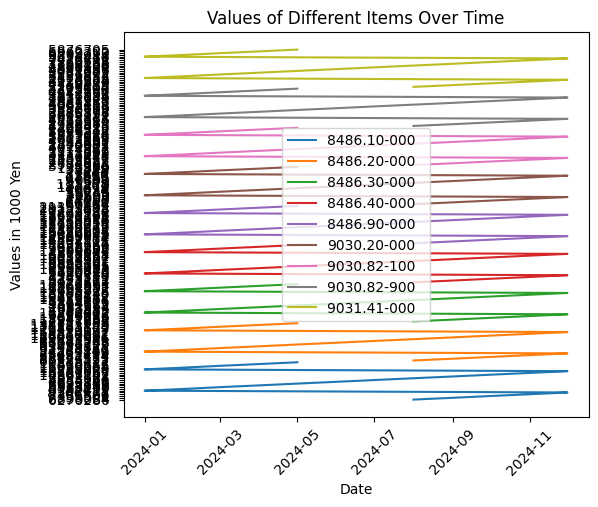

In [ ]:
# Plot all columns in the same graph before logging
plt.figure(figsize=(6, 5))
for i, column in enumerate(data.columns[1:]):
    plt.plot(data['Date'], data[column], label=column)

plt.title('Values of Different Items Over Time')
plt.xlabel('Date')
plt.ylabel('Values in 1000 Yen')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Take the log of values (assuming no NaN values)

In [ ]:
for column in data.columns[1:]:
    data[column] = np.log(data[column])
data

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

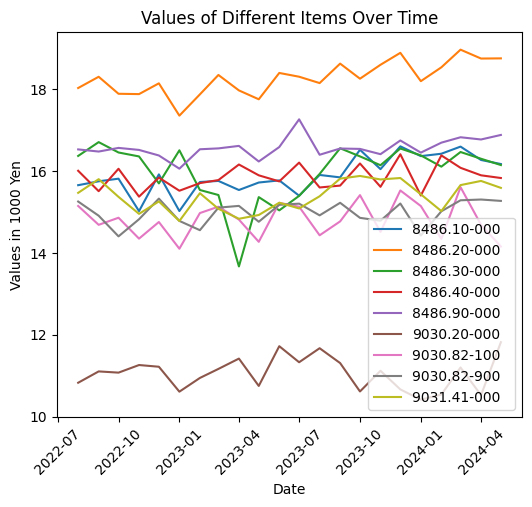

In [ ]:
# Plot all columns in the same graph before logging
plt.figure(figsize=(6, 5))
for i, column in enumerate(data.columns[1:]):
    plt.plot(data['Date'], data[column], label=column)

plt.title('Values of Different Items Over Time')
plt.xlabel('Date')
plt.ylabel('Values in 1000 Yen')
plt.legend()
plt.xticks(rotation=45)
plt.show()

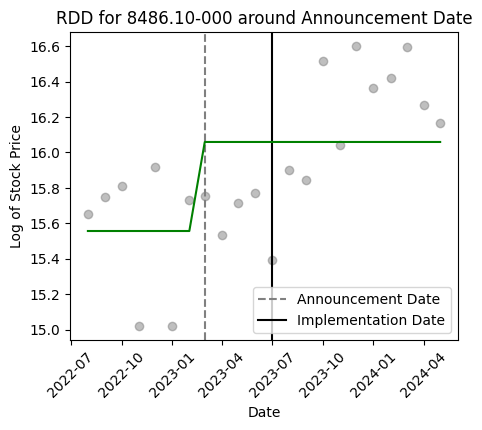

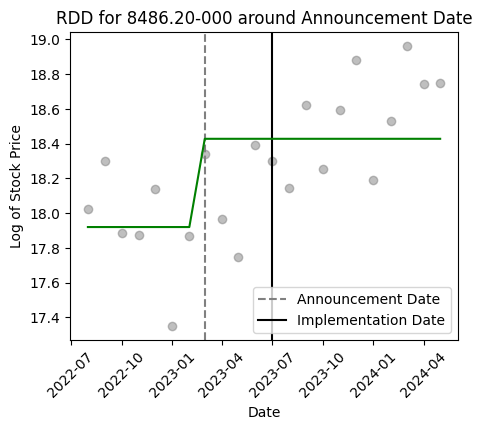

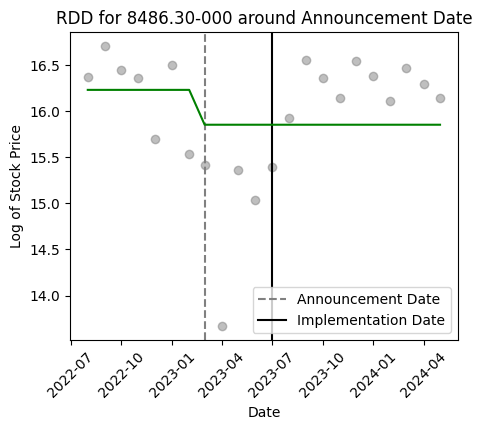

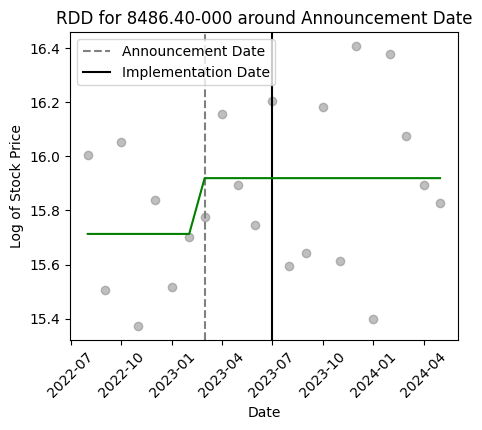

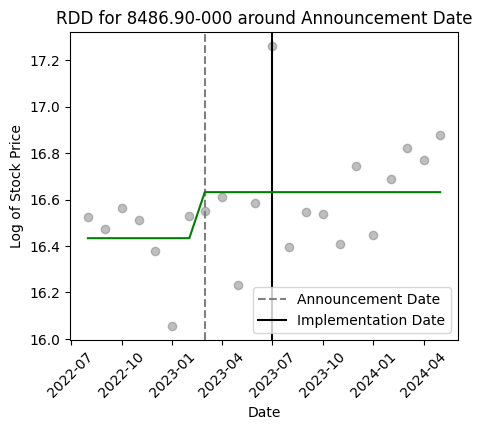

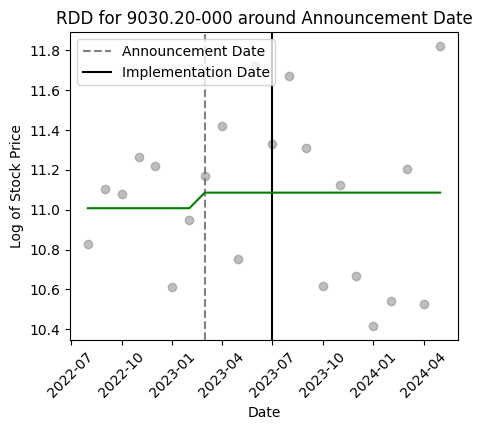

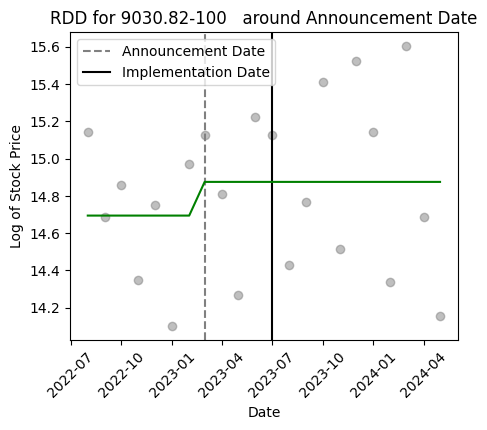

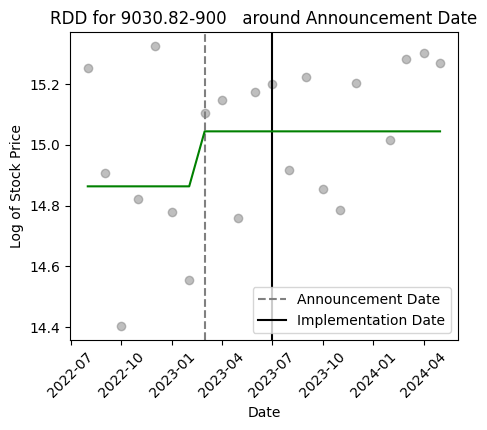

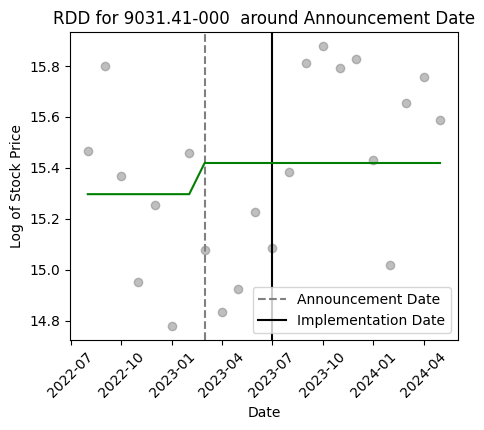

,Stock,Coef,P>|t|,R-squared,F-statistic,Prob (F-statistic)
0,8486.10-000,0.502910,0.010108,0.287454,8.068354,0.010108
1,8486.20-000,0.507687,0.003046,0.362149,11.355286,0.003046
2,8486.30-000,-0.377732,0.246149,0.066620,1.427506,0.246149
3,8486.40-000,0.206234,0.137800,0.106740,2.389889,0.137800
4,8486.90-000,0.198021,0.072401,0.152455,3.597575,0.072401
5,9030.20-000,0.078070,0.683928,0.008460,0.170653,0.683928
6,9030.82-100,0.180775,0.381224,0.038542,0.801740,0.381224
7,9030.82-900,0.180969,0.171743,0.091287,2.009160,0.171743
8,9031.41-000,0.122397,0.465726,0.026908,0.553040,0.465726


In [ ]:
# Define the policy announcement and implementation dates
announcement_date = pd.to_datetime('2023-03')
implementation_date = pd.to_datetime('2023-07')

# Function to run RDD
def run_rdd(data, stock_column, cutoff):
    # Creating the treatment variable
    data['treatment'] = (data['Date'] >= cutoff).astype(int)

    # Running the RDD
    X = sm.add_constant(data[['treatment']])
    y = data[stock_column]
    rdd_model = sm.OLS(y, X).fit()

    return rdd_model

# Plotting function
def plot_rdd(data, stock_column, announcement_cutoff, implementation_cutoff, model, title):
    plt.figure(figsize=(5, 4))
    plt.scatter(data['Date'], data[stock_column], color='gray', alpha=0.5)
    plt.axvline(x=announcement_cutoff, color='grey', linestyle='--', label='Announcement Date')
    plt.axvline(x=implementation_cutoff, color='black', linestyle='-', label='Implementation Date')
    plt.plot(data['Date'], model.predict(sm.add_constant(data[['treatment']])), color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Log of Stock Price')
    plt.legend()
    plt.xticks(rotation =  45)
    plt.show()

# List of stock columns
stock_columns = ['8486.10-000', '8486.20-000', '8486.30-000', '8486.40-000', '8486.90-000', '9030.20-000', '9030.82-100  ', '9030.82-900  ', '9031.41-000 ']

# DataFrame to store model summaries
summary_df = pd.DataFrame(columns=['Stock', 'Coef', 'P>|t|', 'R-squared', 'F-statistic', 'Prob (F-statistic)'])

# Running RDD and plotting for each stock column around the announcement date
for stock in stock_columns:
    model = run_rdd(data, stock, announcement_date)

    # Adding model summary to DataFrame
    summary_df = pd.concat([summary_df, pd.DataFrame({
        'Stock': [stock],
        'Coef': [model.params['treatment']],
        'P>|t|': [model.pvalues['treatment']],
        'R-squared': [model.rsquared],
        'F-statistic': [model.fvalue],
        'Prob (F-statistic)': [model.f_pvalue]
    })], ignore_index=True)

    plot_rdd(data, stock, announcement_date, implementation_date, model, f'RDD for {stock} around Announcement Date')

# Displaying the summary DataFrame
display(summary_df)